In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Reviews.csv.zip')


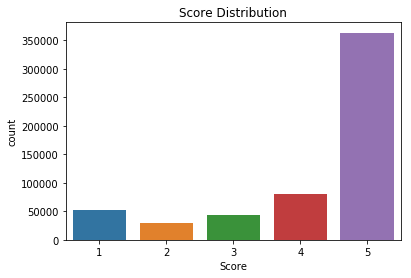

In [3]:
ax = plt.axes()
sns.countplot(df.Score,ax=ax)
ax.set_title('Score Distribution')
plt.show()



In [3]:
df['Positively Rated'] = np.where(df['Score']>3,1,0)


In [4]:
x = df['Text']
y = df['Positively Rated']

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,20000):
    review = re.sub('[^a-zA-Z]',' ',x[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
# y = df.iloc[:,-1].values

In [8]:
y = df.iloc[0:20000,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)



In [ ]:

from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm